In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


In [94]:
# Import the dataset
path = "seeds_dataset.txt"
column_names = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'assymmetry_Coef', 'kernelGroove_length', 'Target']
df = pd.read_csv(path, header = None, delimiter='\t', names = column_names)


In [95]:
df.head(10) 

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_Coef,kernelGroove_length,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [96]:
df.describe

<bound method NDFrame.describe of       area  perimeter  compactness  kernel_length  kernel_width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
205  12.19      13.20       0.8783          5.137         2.981   
206  11.23      12.88       0.8511          5.140         2.795   
207  13.20      13.66       0.8883          5.236         3.232   
208  11.84      13.21       0.8521          5.175         2.836   
209  12.30      13.34       0.8684          5.243         2.974   

     assymmetry_Coef  kernelGroove_length  Target  
0              2.221                5.220       1  
1              1.018                4.956       1  
2    

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 210 non-null    float64
 1   perimeter            210 non-null    float64
 2   compactness          210 non-null    float64
 3   kernel_length        210 non-null    float64
 4   kernel_width         210 non-null    float64
 5   assymmetry_Coef      210 non-null    float64
 6   kernelGroove_length  210 non-null    float64
 7   Target               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [98]:
df.isnull().sum()

area                   0
perimeter              0
compactness            0
kernel_length          0
kernel_width           0
assymmetry_Coef        0
kernelGroove_length    0
Target                 0
dtype: int64

In [99]:
df.nunique()

area                   193
perimeter              170
compactness            186
kernel_length          188
kernel_width           184
assymmetry_Coef        207
kernelGroove_length    148
Target                   3
dtype: int64

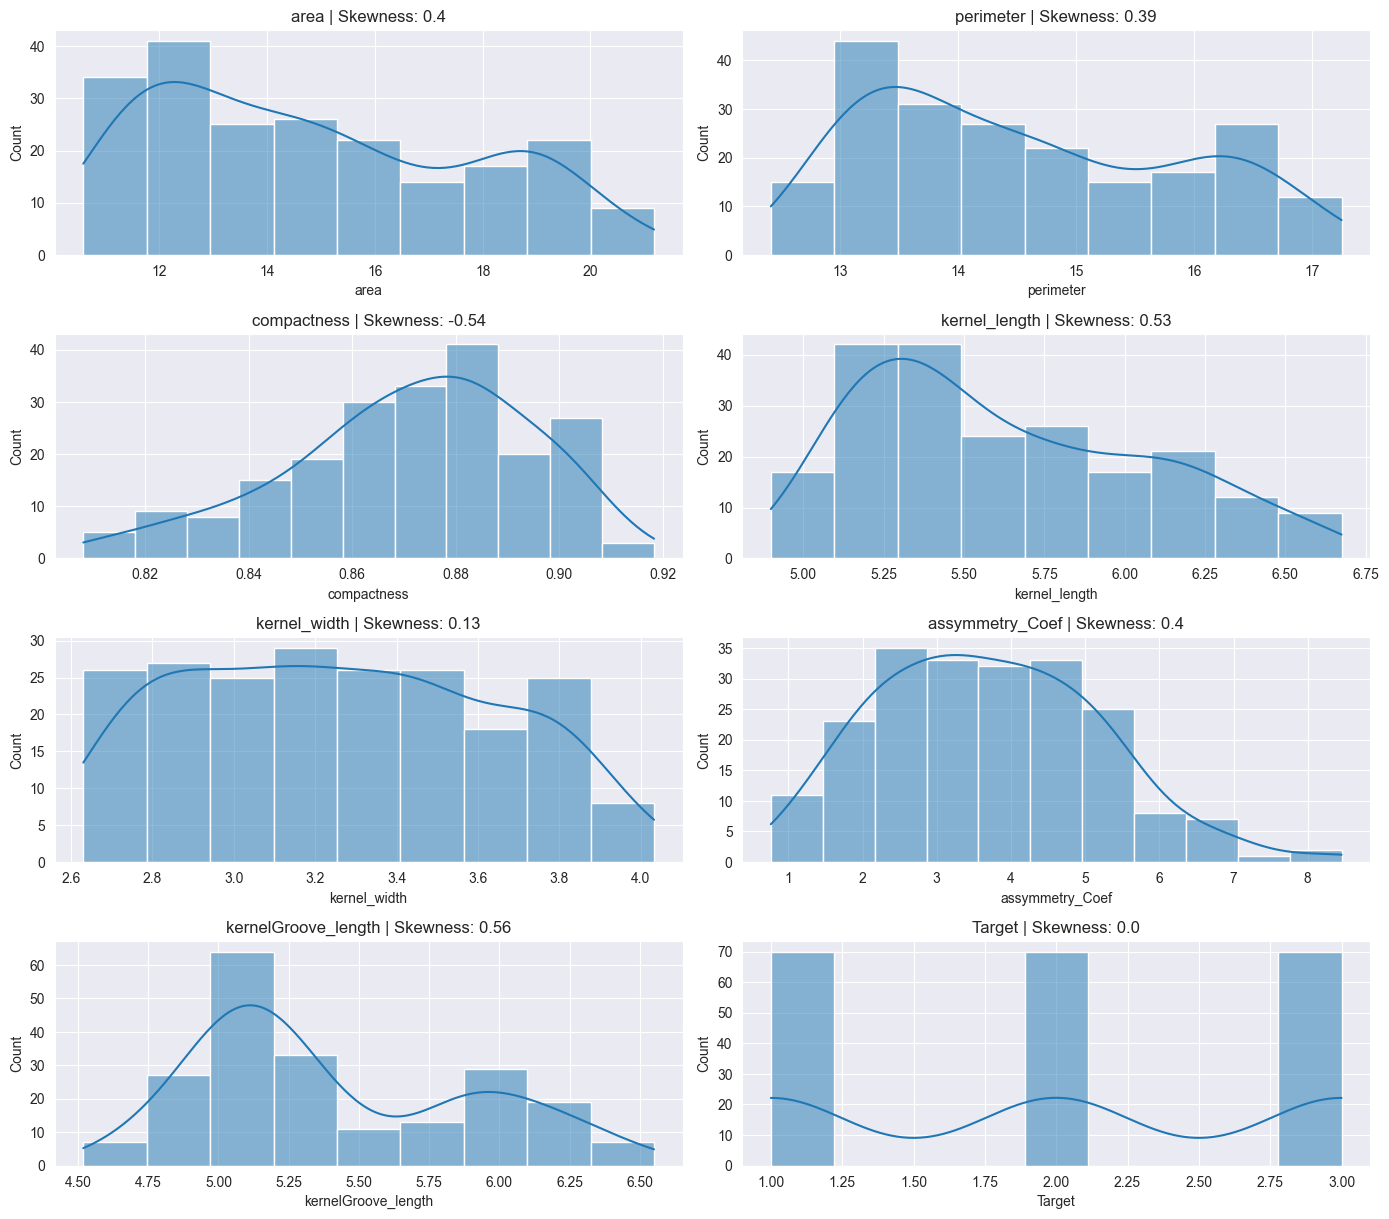

In [100]:
sns.set_style("darkgrid")
 

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
 
# Adjust layout and show plots
plt.tight_layout()
plt.show()

<Axes: xlabel='area', ylabel='compactness'>

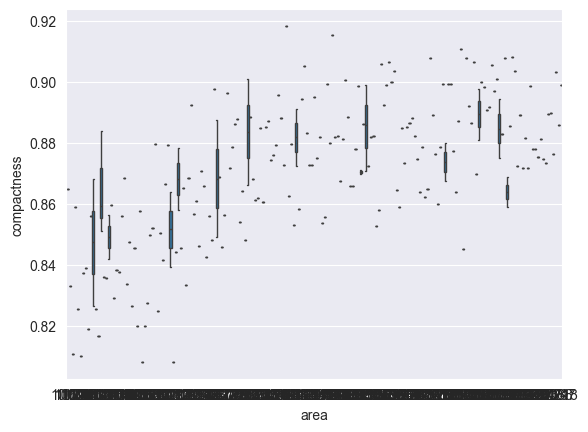

In [101]:
sns.boxplot(x='area', y='compactness', data=df)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 210 non-null    float64
 1   perimeter            210 non-null    float64
 2   compactness          210 non-null    float64
 3   kernel_length        210 non-null    float64
 4   kernel_width         210 non-null    float64
 5   assymmetry_Coef      210 non-null    float64
 6   kernelGroove_length  210 non-null    float64
 7   Target               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


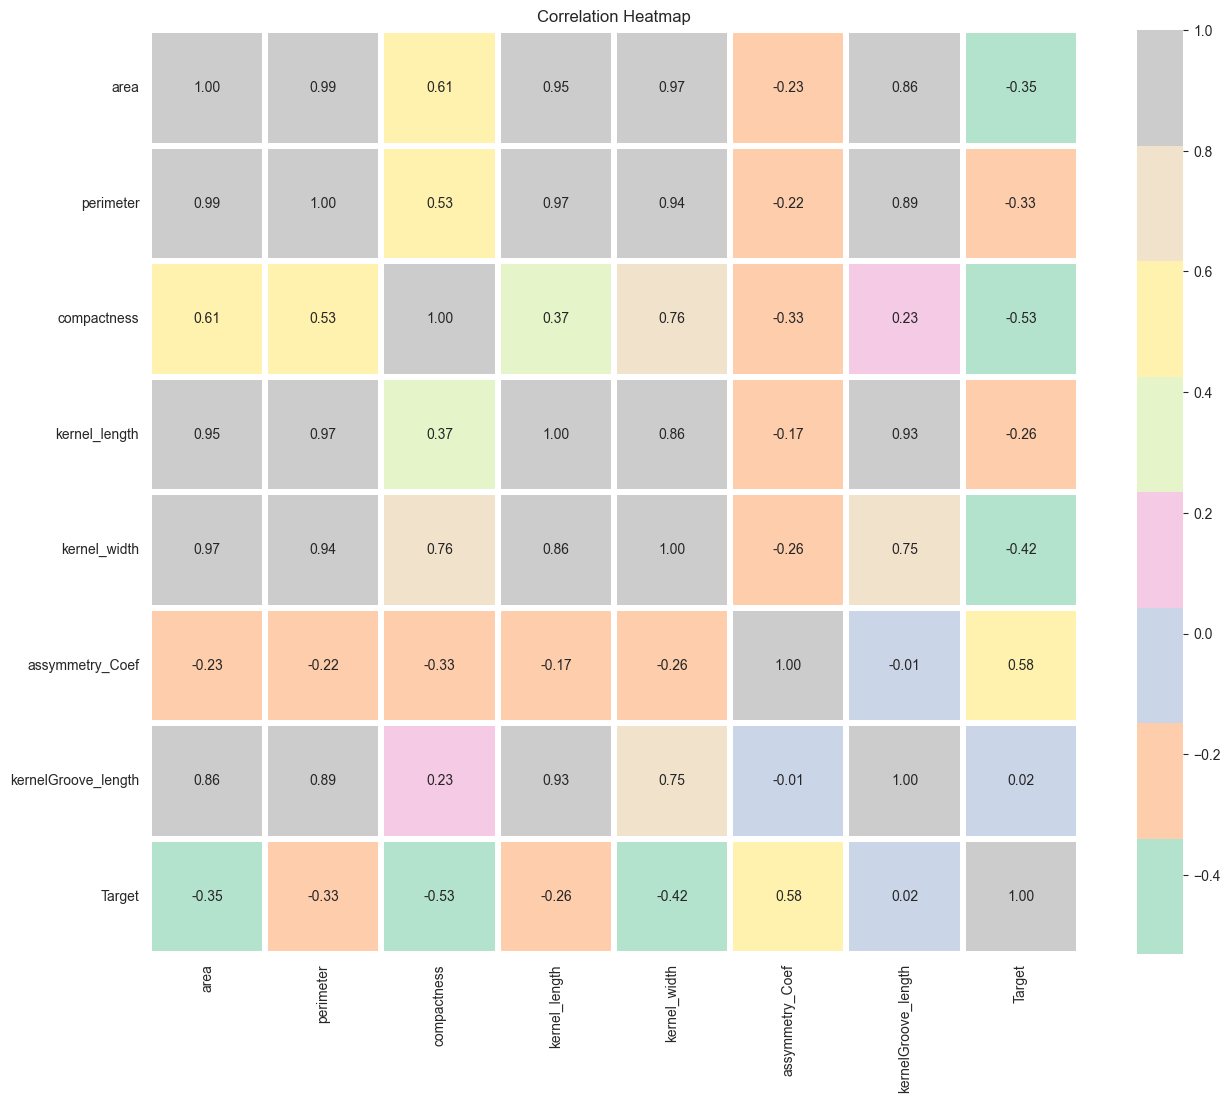

In [103]:

plt.figure(figsize=(15, 12))

 
# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=3)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()


In [104]:
df.corr()

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_Coef,kernelGroove_length,Target
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
kernel_length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
kernel_width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
assymmetry_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
kernelGroove_length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [105]:
X = df.drop('Target', axis=1)
y = df["Target"]

In [106]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [107]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [108]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [109]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [110]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [111]:
model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_247 (Dense)           (None, 16)                128       
                                                                 
 dense_248 (Dense)           (None, 16)                272       
                                                                 
 dense_249 (Dense)           (None, 3)                 51        
                                                                 
Total params: 451 (1.76 KB)
Trainable params: 451 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [113]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
6/6 [==============================] - 1s 33ms/step - loss: 0.9912 - accuracy: 0.4821 - val_loss: 0.9290 - val_accuracy: 0.4762
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.9278 - accuracy: 0.4762 - val_loss: 0.8684 - val_accuracy: 0.5238
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.8745 - accuracy: 0.5357 - val_loss: 0.8154 - val_accuracy: 0.5714
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.8272 - accuracy: 0.6488 - val_loss: 0.7665 - val_accuracy: 0.8095
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.7831 - accuracy: 0.7619 - val_loss: 0.7223 - val_accuracy: 0.8095
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.7419 - accuracy: 0.7798 - val_loss: 0.6785 - val_accuracy: 0.8571
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.7026 - accuracy: 0.7857 - val_loss: 0.6355 - val_accuracy: 0.8571
Epoch 8/50
6/6 [=================

In [114]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 21ms/step - loss: 0.1545 - accuracy: 0.9524
Test Loss: 0.1545, Test Accuracy: 0.9524


In [115]:
def dense_netwrok_model(units_list, learning_rate, optimizer):
    model = Sequential()
    for units in units_list:
        model.add(Dense(units=units, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# List of models with different architectures, learning rates, and optimizers
models = [
    {'name': 'Model_1', 'units_list': [8, 8], 'learning_rate': 0.001, 'optimizer': Adam},
    {'name': 'Model_2', 'units_list': [16, 16], 'learning_rate': 0.01, 'optimizer': SGD},
    {'name': 'Model3', 'units_list': [32, 16, 8], 'learning_rate': 0.0001, 'optimizer': Adam},
]


histories = []  

In [116]:
for model_info in models:
    print(f"Training {model_info['name']} and Optimzer:{model_info['optimizer']}")
    optimizer_instance = model_info['optimizer'](learning_rate=model_info['learning_rate'])
    model = dense_netwrok_model(model_info['units_list'], learning_rate=model_info['learning_rate'], optimizer=optimizer_instance)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    histories.append(history)  # Store the history for visualizing tasks
    # Evaluate on test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'{model_info["name"]} - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Training Model_1 and Optimzer:<class 'keras.src.optimizers.adam.Adam'>
Model_1 - Test Loss: 0.2311, Test Accuracy: 0.9048
Training Model_2 and Optimzer:<class 'keras.src.optimizers.sgd.SGD'>
Model_2 - Test Loss: 0.4200, Test Accuracy: 0.8571
Training Model3 and Optimzer:<class 'keras.src.optimizers.adam.Adam'>
Model3 - Test Loss: 0.6968, Test Accuracy: 0.6667


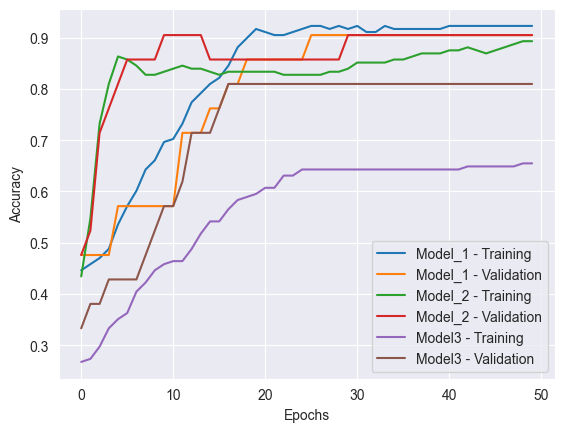

In [117]:
for model_info, history in zip(models, histories):
    plt.plot(history.history['accuracy'], label=f'{model_info["name"]} - Training')
    plt.plot(history.history['val_accuracy'], label=f'{model_info["name"]} - Validation')
    

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()